In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import scopesim as sim

### Have a look at the global variables 

In [2]:
print(sim.rc.__config__)

<SystemDict> contents:
SIM: 
  spectral: {'wave_min': 0.3, 'wave_mid': 2.2, 'wave_max': 20, 'wave_unit': 'um', 'spectral_resolution': 0.0001, 'minimum_throughput': 1e-06, 'minimum_pixel_flux': 1}
  sub_pixel: {'flag': False, 'fraction': 1}
  random: {'seed': 'None'}
  computing: {'chunk_size': 512, 'max_segment_size': 1048576, 'oversampling': 1, 'spline_order': 1, 'flux_accuracy': 0.001}
  file: {'local_packages_path': './', 'server_base_url': 'https://www.univie.ac.at/simcado/InstPkgSvr/', 'use_cached_downloads': False, 'search_path': ['./']}
  reports: {'verbose': False, 'block_ip_tracking': False}
OBS: 
TEL: 
  etendue: 0
  area: 0
INST: 
  pixel_scale: 0
  plate_scale: 0


### Look at which packages are available on the server and locally

In [3]:
sim.server.database.list_packages()


Packages saved on the server: https://www.univie.ac.at/simcado/InstPkgSvr/
instruments/HAWKI.zip
instruments/MAORY.zip
instruments/MICADO.zip
instruments/test_package.zip
locations/Armazones.zip
locations/Paranal.zip
telescopes/ELT.zip
telescopes/VLT.zip

Packages saved locally: ./
HAWKI
Paranal
VLT


### Download the packages needed for HAWKI

In [5]:
sim.server.database.download_package(["locations/Paranal.zip", "telescopes/VLT.zip", "instruments/HAWKI.zip"])

['C:\\Work\\SimCADO_misc\\testing_scopesim\\Paranal.zip',
 'C:\\Work\\SimCADO_misc\\testing_scopesim\\VLT.zip',
 'C:\\Work\\SimCADO_misc\\testing_scopesim\\HAWKI.zip']

### Load in the HAWKI configuration

In [4]:
cmds = sim.UserCommands(use_instrument="HAWKI")

In [5]:
# cmds.yaml_dicts
cmds

<SystemDict> contents:
SIM: 
  spectral: {'wave_min': 0.85, 'wave_mid': 1.6, 'wave_max': 2.5, 'wave_unit': 'um', 'spectral_resolution': 0.0001, 'minimum_throughput': 1e-06, 'minimum_pixel_flux': 1}
  sub_pixel: {'flag': False, 'fraction': 1}
  random: {'seed': 9001}
  computing: {'chunk_size': 512, 'max_segment_size': 1048576, 'oversampling': 1, 'spline_order': 1, 'flux_accuracy': 0.001}
  file: {'local_packages_path': './', 'server_base_url': 'https://www.univie.ac.at/simcado/InstPkgSvr/', 'use_cached_downloads': False, 'search_path': ['./']}
  reports: {'verbose': False, 'block_ip_tracking': False}
OBS: 
  filter_name: Ks
  airmass: 1.2
  declination: -30
  hour_angle: 0
  pupil_angle: 0
  dit: 60
  ndit: 1
TEL: 
  etendue: 0
  area: 0
  temperture: !ATMO.temperature
INST: 
  pixel_scale: 0.106
  plate_scale: 10.6
  temperature: -198
  filter_file_format: TC_filter_{}.dat
ATMO: 
  altitude: 2635
  longitude: -70.4042
  latitude: -24.6272
  temperature: 9
  humidity: 0.15
  pressure: 

### Make an OpticalTrain object

In [6]:
opt = sim.OpticalTrain(cmds)

### Have a look at the things inside the optical train - here the Field of Views

In [7]:
opt.fov_manager.fovs

[FOV id: 0, with dimensions (512, 512)
 Sky centre: (-0.05915388888888889, -0.059171997219548446)
 Image centre: (-20.090000000000003, -20.090000000000003)
 Wavelength range: (1.9225 um, 2.3845 um)um,
 FOV id: 0, with dimensions (512, 512)
 Sky centre: (-0.05915388888888889, -0.04412588610843734)
 Image centre: (-20.090000000000003, -14.979999999999999)
 Wavelength range: (1.9225 um, 2.3845 um)um,
 FOV id: 0, with dimensions (512, 512)
 Sky centre: (-0.05915388888888889, -0.02902088610843733)
 Image centre: (-20.090000000000003, -9.85)
 Wavelength range: (1.9225 um, 2.3845 um)um,
 FOV id: 0, with dimensions (512, 512)
 Sky centre: (-0.05915388888888889, -0.013945330552881779)
 Image centre: (-20.090000000000003, -4.74)
 Wavelength range: (1.9225 um, 2.3845 um)um,
 FOV id: 0, with dimensions (512, 512)
 Sky centre: (-0.05915388888888889, 0.0011302250026737782)
 Image centre: (-20.090000000000003, 0.3900000000000001)
 Wavelength range: (1.9225 um, 2.3845 um)um,
 FOV id: 0, with dimension

In [8]:
opt.detector_array.detector_lists[0].table

id,x_cen,y_cen,xhw,yhw,x_len,y_len,pixsize,angle,gain
int32,float64,float64,float64,float64,int32,int32,float64,float64,float64
1,-11.39,-11.4,10.24,10.24,2048,2048,0.01,0.0,1.705
2,10.615,-11.375,10.24,10.24,2048,2048,0.01,0.13,1.87
3,10.66,10.52,10.24,10.24,2048,2048,0.01,0.04,1.735
4,-11.34,10.495,10.24,10.24,2048,2048,0.01,0.03,2.11


### __currsys__ : current system dictionary
When an OpticalTrain is make, the internal yaml dictionaries are attached to the global variable ``scopesim.rc.__currsys__``. OpticalTrain quite ofter refers back to global variable here, such as "!OBS.filter_name", or "!OBS.dit"

In [13]:
sim.rc.__currsys__["!OBS"]

{'filter_name': 'Ks',
 'airmass': 1.2,
 'declination': -30,
 'hour_angle': 0,
 'pupil_angle': 0,
 'dit': 60,
 'ndit': 1}

### Make an empty sky and observe it

In [14]:
empty_sky = sim.source.source_utils.empty_sky()

In [15]:
opt.observe(empty_sky, kwargs={"!OBS.dit": 60, "!OBS.ndit": 10})

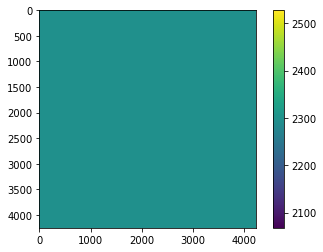

In [16]:
plt.imshow(opt.image_plane.image)
plt.colorbar()

### Read out the ImagePlane onto the Detetors

In [17]:
hdu = opt.readout()

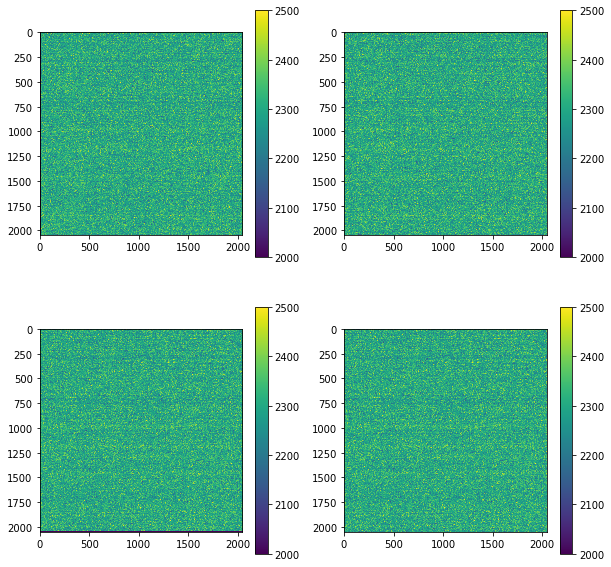

In [20]:
plt.figure(figsize=(10,10))
for i in range(1,5):
    plt.subplot(2,2,i)
    plt.imshow(hdu[i].data, vmin=2000, vmax=2500)
    plt.colorbar()